In [130]:
import torch
import torchvision.transforms as t
from PIL import Image
import plyfile as plyData
from matplotlib import pyplot as plt
import cv2
import numpy as np
from plyfile import PlyData
import pandas as pd 

In [174]:
# kok_path_rgb = "k1_rgb.jpg"
# kok_path_pc = "k1_pc.ply"


# kok_path_rgb = "k2_rgb.jpg"
# kok_path_pc = "k2_pc.ply"

kok_path_rgb = "k3_rgb.jpg"
kok_path_pc = "k3_pc.ply"


# kok_path_depth = "rgb.jpg"

lnt_path_rgb = "rgb.jpg"
# lnt_path_depth = "rgb.jpg"
lnt_path_pc = "rgb.jpg"

kok_image_rgb = Image.open(kok_path_rgb)
lnt_image_rgb = Image.open(lnt_path_rgb)
kok_rgb = cv2.imread(kok_path_rgb)
# kok_depth 
# kok_pc
lnt_rgb = cv2.imread(lnt_path_rgb)
# lnt_depth
# lnt_pc

In [175]:
trans = t.Compose([
    t.Resize((128,128))
#     t.Resize((128,128)),
#     t.RandomCrop((100,100)) # random 을 줄 수도 있다. 
])

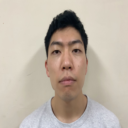

In [176]:

kok_image_rgb = trans(kok_image_rgb)
kok_image_rgb

In [177]:
np_rgb = np.array(kok_image_rgb)
np_rgb.shape

# mean = np.mean(np_rgb, axis=(1,2), keepdims=True)
# std = np.std(np_rgb, axis=(1,2), keepdims=True)
# standardized_images_out = (np_rgb - mean) / std

(128, 128, 3)

In [178]:
plydata = PlyData.read(kok_path_pc)
ply_test = pd.DataFrame({key_: plydata['vertex'][key_] for key_ in ['x', 'y', 'z', 'red', 'green', 'blue', 'cx', 'cy', 'depth', 'alpha']})
ply_test

,x,y,z,red,green,blue,cx,cy,depth,alpha
0,-10788.977539,-42241.937500,-23830.287109,0,0,0,0.0,0.0,0.609863,255
1,-10788.986328,-42241.941406,-23830.283203,0,0,0,0.0,1.0,0.602051,255
2,-10788.978516,-42241.937500,-23830.287109,0,0,0,0.0,2.0,0.608887,255
3,-10788.975586,-42241.937500,-23830.289062,0,0,0,0.0,3.0,0.612305,255
4,-10788.974609,-42241.937500,-23830.289062,0,0,0,0.0,4.0,0.612793,255
...,...,...,...,...,...,...,...,...,...,...
49147,-10788.929688,-42241.996094,-23830.212891,0,0,0,255.0,187.0,0.668457,255
49148,-10788.921875,-42241.996094,-23830.216797,0,0,0,255.0,188.0,0.675781,255
49149,-10788.928711,-42242.000000,-23830.212891,0,0,0,255.0,189.0,0.669434,255
49150,-10788.922852,-42241.996094,-23830.216797,0,0,0,255.0,190.0,0.675781,255


In [179]:
max(ply_test['depth'])

0.69091796875

In [180]:
min(ply_test['depth'])

0.361328125

In [113]:
ply_test['depth']

0        3.388672
1        3.396484
2        3.423828
3        3.501953
4        3.533203
           ...   
49147    1.078125
49148    1.085938
49149    1.078125
49150    1.072266
49151    1.082031
Name: depth, Length: 49152, dtype: float32

In [181]:
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr_kok = cv2.calcHist([rgb_kok], [i], None, [256], [0,256])
    histr_lnt = cv2.calcHist([rgb_lnt], [i], None, [256], [0,256])
    plt.plot(histr_kok, color= col)
    plt.title(f"kok_{col}")
    plt.show()
    plt.plot(histr_lnt, color= col)
    plt.title(f"LT_{col}")
    plt.show()

NameError: name 'rgb_kok' is not defined